In [1]:
import pandas as pd
import numpy as np
import sklearn

In [2]:
df = pd.read_csv('spam.csv' ,encoding='latin-1') #encoding='latin-1' used bcz readcsv show the utf-8 eeror
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4427,ham,Aiyar dun disturb u liao... Thk u have lots 2 ...,NaN,NaN,NaN
3968,ham,Thanks for your message. I really appreciate y...,NaN,NaN,NaN
1650,ham,I dont have any of your file in my bag..i was ...,NaN,NaN,NaN
2743,ham,But my family not responding for anything. Now...,NaN,NaN,NaN
2644,ham,My friends use to call the same.,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

Stepsss
1- Data Cleaning
2- EDA
3- Text Preprocessing
4- Model building
5- evaluation 
6- Improvement
7- web
8- Deploye

In [5]:
#Data Cleaing
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(["Unnamed: 2" , "Unnamed: 3" , "Unnamed: 4"] , axis=1 , inplace=True)

In [7]:
df.head(3)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [8]:
#renamingg the columnsss
df.rename(columns={'v1' : 'target' , 'v2' : 'text'} , inplace=True)

In [9]:
df.sample(5)

,target,text
2702,ham,"Omw back to tampa from west palm, you hear wha..."
3836,ham,Early bird! Any purchases yet?
2406,ham,One of best dialogue in cute reltnship..!! \We...
747,spam,U are subscribed to the best Mobile Content Se...
4424,ham,Just now saw your message.it k da:)


In [10]:
#convert target into label
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['target'] = lr.fit_transform(df['target'])

In [11]:
df.sample(5)

,target,text
4912,1,"Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry ..."
5343,0,No go. No openings for that room 'til after th...
5164,1,Congrats 2 mobile 3G Videophones R yours. call...
174,0,"Well, i'm gonna finish my bath now. Have a goo..."
1543,1,Hello from Orange. For 1 month's free access t...


In [12]:
print(f"Null values \n{df.isnull().sum()}")
print(f"Duplicates Values {df.duplicated().sum()}")

Null values 
target    0
text      0
dtype: int64
Duplicates Values 403


In [13]:
df['target'].unique()

array([0, 1])

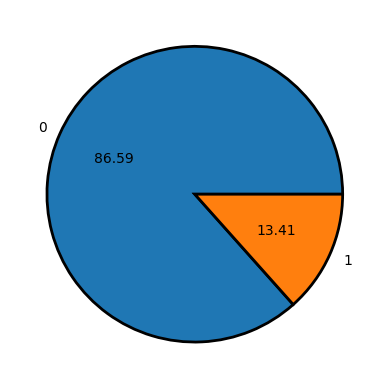

In [14]:
#EDAA
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts() , labels=df['target'].unique() , autopct="%0.2f" , wedgeprops = {"edgecolor" : "black",  # type: ignore
                      'linewidth': 2, 
                      'antialiased': True})
plt.show()
#data is imbalanceddd

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Deep
[nltk_data]     Kothari\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [16]:
df['text_num_charch'] = df['text'].apply(len) #here find the length of charchter in each lineee

In [17]:
df.sample(5)

,target,text,text_num_charch
324,0,No problem. How are you doing?,30
5055,0,Goodnight da thangam I really miss u dear.,42
1340,0,Might ax well im there.,23
3817,1,74355 XMAS iscoming & ur awarded either å£500 ...,120
2478,0,Not yet. Just i'd like to keep in touch and it...,137


In [18]:
df['num_wordds'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#num of worddss used in one sentences

In [19]:
df['sentences_numss'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [20]:
df.head()

,target,text,text_num_charch,num_wordds,sentences_numss
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df.describe()

,target,text_num_charch,num_wordds,sentences_numss
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [22]:
df[df['target'] == 0].describe() #describe only on which is not spammm

,target,text_num_charch,num_wordds,sentences_numss
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.276269,1.837720
std,0.0,58.016023,13.988585,1.454388
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [23]:
df[df['target'] == 1].describe()#describeee onlyy on Spaammm

,target,text_num_charch,num_wordds,sentences_numss
count,747.0,747.000000,747.000000,747.000000
mean,1.0,138.866131,27.891566,3.021419
std,0.0,29.183082,6.867007,1.537580
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.500000,25.000000,2.000000
50%,1.0,149.000000,29.000000,3.000000
75%,1.0,157.000000,32.000000,4.000000
max,1.0,224.000000,46.000000,9.000000


In [24]:
import seaborn as sns

StopIteration: 

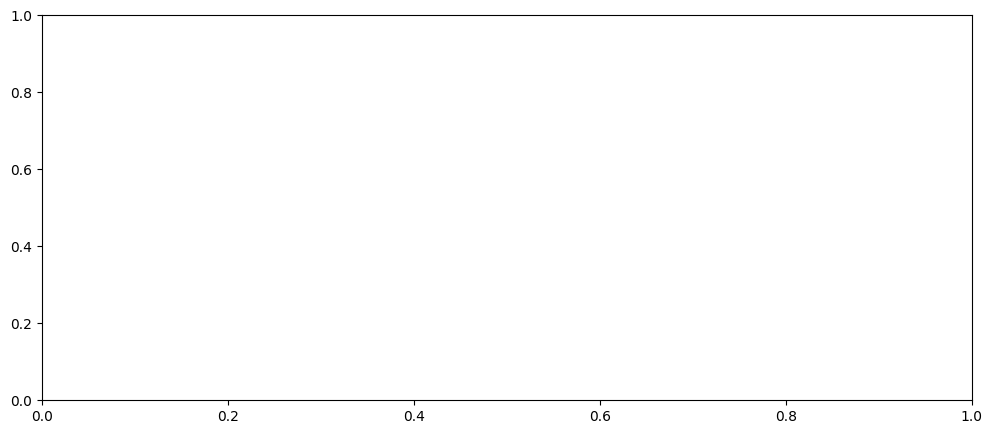

In [27]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['text_num_charch']) # type: ignore
sns.histplot(df[df['target'] == 1]['text_num_charch']) # type: ignore

<Axes: xlabel='num_wordds', ylabel='Count'>

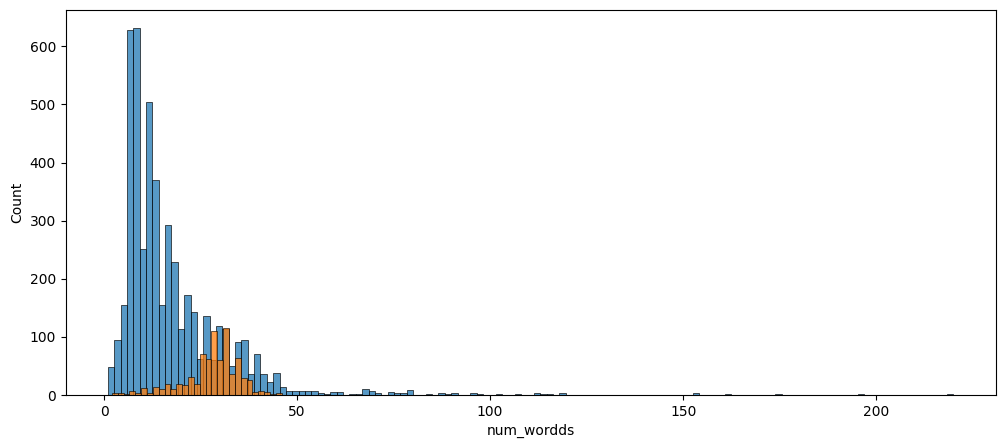

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target'] == 0]['num_wordds']) # type: ignore
sns.histplot(df[df['target'] == 1]['num_wordds']) # type: ignore

<Axes: >

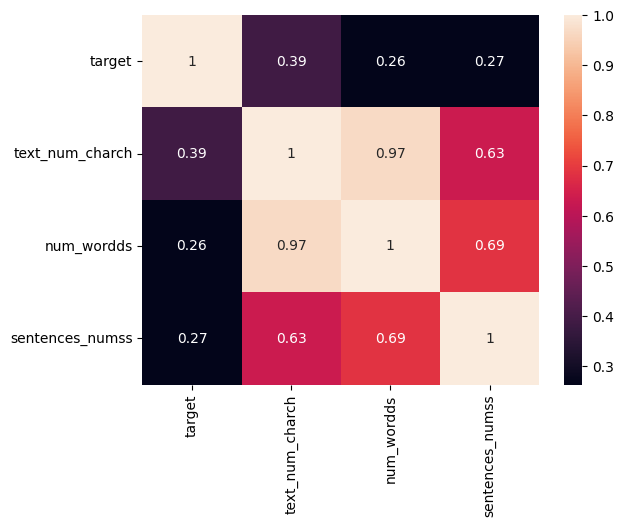

In [ ]:
sns.heatmap(df.corr(numeric_only=True) , annot=True)

#Data Preprocessing
*Lower Case
*TOkenize
*Removes specoal characters
*Remove word and punch ,words like special charcter
*Steamming(different word same meaning)

In [ ]:
#download the stops wordss
import nltk
nltk.download('stopwords' , download_dir="stopwprdss")

[nltk_data] Downloading package stopwords to stopwprdss...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
list_eng = open('D:/Vs.code/.vscode/Emaill Spamm Prediction/stopwprdss/corpora/stopwords/english' , 'r')
#print(list.read())
list_eng = list_eng.read()
list_eng = list_eng.split()
print(list_eng)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
englis_list = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
print(englis_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
#find the punctuaion
import string
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [ ]:
#steamminggg
from nltk.stem.porter import PorterStemmer
pr = PorterStemmer() 

In [ ]:
pr.stem('dancing')#using the we converrr similar wordds but different meaning into one wordss ex reading , readed to -> read onlyy

'danc'

In [ ]:
def transform_text(text):
    text_lower = text.lower()
    text_with_token = nltk.word_tokenize(text_lower)

    y = []
    for i in text_with_token:
        if i.isalnum():
            y.append(i)

    text = y[:] #cloning
    y.clear()
    for i in text:
        if i not in englis_list and i not in string.punctuation :
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(pr.stem(i))
         

    return " ".join(y) #list -> str

In [ ]:
transform_text("I Loveddd you tubee videos on ml ") #hree remove the stopwords and puchtuations

'loveddd tube video ml'

In [ ]:
df['transform_text'] = df['text'].apply(transform_text)

In [ ]:
df.head()

,target,text,text_num_charch,num_wordds,sentences_numss,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
#wrodcloude for spamm wprd
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500 , min_font_size=10 , background_color='white')

In [ ]:
spam_wc = wc.generate(df[df['target'] == 1]["transform_text"].str.cat(sep=" "))

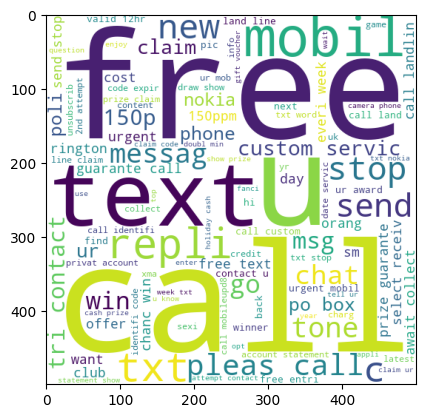

In [ ]:
plt.imshow(spam_wc)

In [ ]:
#for not spammm 
notspamm_wc = wc.generate(df[df['target'] == 0]['transform_text'].str.cat(sep=" "))

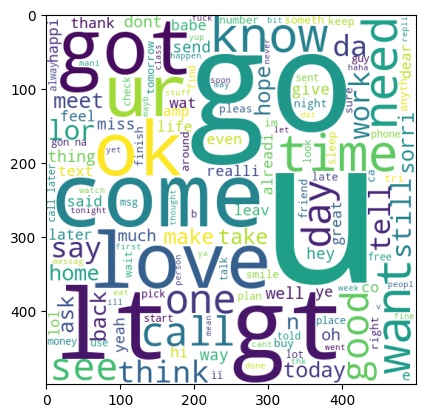

In [ ]:
plt.imshow(notspamm_wc)

In [ ]:
#top30 word in spammm messages
spam_coubt = []
for mes in df[df['target'] == 1]['transform_text'].tolist():
    for words in mes.split():
        spam_coubt.append(words)

In [ ]:
len(spam_coubt)

11490

Top 30 Wordss in Spamm messagess


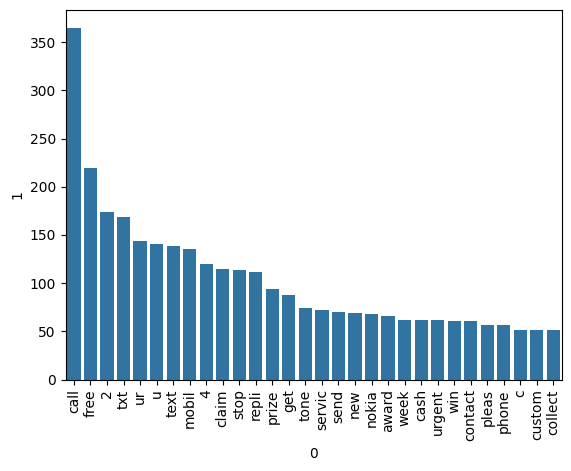

In [ ]:
from collections import Counter
print("Top 30 Wordss in Spamm messagess")
spamdf = pd.DataFrame(Counter(spam_coubt).most_common(30))
sns.barplot( x = spamdf[0] , y=spamdf[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
#mostcomman worddsss in not-spammm text
not_spam = []
for mes in df[df['target'] == 0]['transform_text'].to_list():
    for wrd in mes.split():
        not_spam.append(wrd)


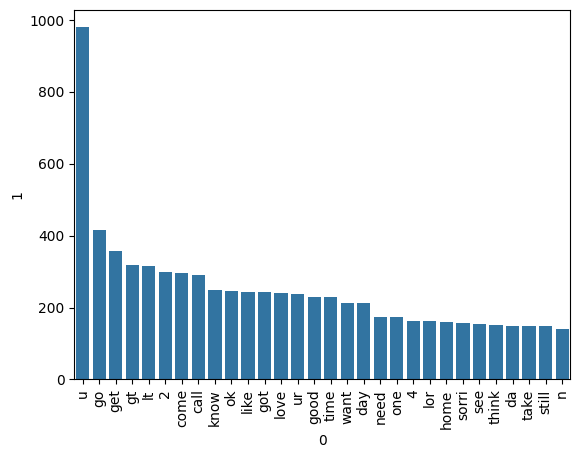

In [ ]:
from collections import  Counter
not_spam_df = pd.DataFrame(Counter(not_spam).most_common(30))
sns.barplot(x = not_spam_df[0] , y = not_spam_df[1])
plt.xticks(rotation = 'vertical')
plt.show()

MOdeelll Buildingggg
Naviyee Baseddd

In [ ]:
#conver textintovector using
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()# bagofwordss
tfid = TfidfVectorizer(max_features=3000)

In [ ]:
x = tfid.fit_transform(df['transform_text']).toarray()# type: ignore #convert into array bcz is generates sparse array
x.shape

(5572, 3000)

In [ ]:
y = df['target'].values #fetch as aarya not series using values
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4457, 3000)
(4457,)
(1115, 3000)
(1115,)


In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB ,   BernoulliNB
Gb = GaussianNB()
mb = MultinomialNB()
Be = BernoulliNB()

In [ ]:
Gb.fit(X_train , y_train)
y_pred = Gb.predict(x_test)

0.8654708520179372
0.5165289256198347
[[840 117]
 [ 33 125]]


<Axes: >

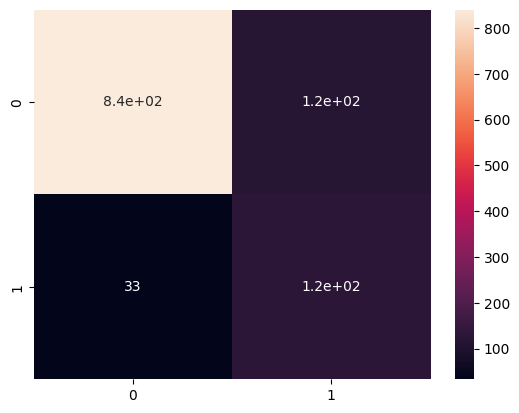

In [ ]:
from sklearn.metrics import accuracy_score , precision_score , confusion_matrix
print(accuracy_score(y_test , y_pred))
print(precision_score(y_test , y_pred))
print(confusion_matrix(y_pred=y_pred , y_true=y_test) )
sns.heatmap(confusion_matrix(y_pred=y_pred , y_true=y_test) , annot=True)
#here precision scoree is too loww so used different modelss(inbalanced data accuray not more Important thann precision score)

In [ ]:
mb.fit(X_train , y_train)
y_pred_mb = mb.predict(x_test)
print(accuracy_score(y_pred_mb , y_test))
print(confusion_matrix(y_test , y_pred_mb))
print(precision_score(y_test , y_pred_mb))
#here when we convert text into vector usinf tfid the precision sccore is 1 and this is in balanced data so precision score is imp

0.9650224215246637
[[956   1]
 [ 38 120]]
0.9917355371900827


In [ ]:
Be.fit(X_train , y_train)
y_pred_be = Be.predict(x_test)
print(accuracy_score(y_pred=y_pred_be , y_true=y_test)) 
print(confusion_matrix(y_true=y_test , y_pred=y_pred_be))
print(precision_score(y_test , y_pred_be))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [ ]:
import pickle 
pickle.dump(tfid , open('vectarization.pkl' , 'wb'))
pickle.dump(mb , open('model.pkl' , 'wb'))